**Подключение библиотек**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df1 = pd.read_csv('train_spam.csv')
df1

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


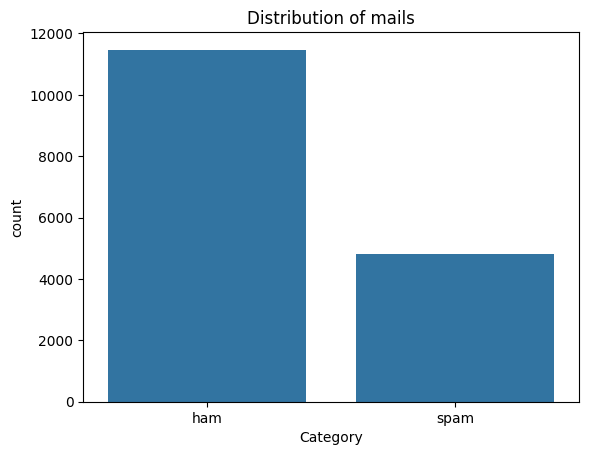

In [20]:
sns.countplot(data=df1, x='text_type')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [21]:
df1['status']=df1['text_type'].apply(lambda x:1 if x=='spam' else 0)
df1 = df1.drop(['text_type'],axis=1)
df1.head(5)

,text,status
0,make sure alex knows his birthday is over in f...,0
1,a resume for john lavorato thanks vince i will...,0
2,plzz visit my website moviesgodml to get all m...,1
3,urgent your mobile number has been awarded wit...,1
4,overview of hr associates analyst project per ...,0


In [22]:
X = df1["text"]
Y = df1["status"]

**Деление на тестовую и обучающую выборку**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [24]:
print(X_train.shape)
print(X_test.shape)

(13022,)
(3256,)


In [25]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [26]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [27]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [29]:
predict_train_data=model.predict(X_train_features)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9484718169252035


In [31]:
predict_test_data=model.predict(X_test_features)

In [32]:
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9247542997542998


**ROC_AUC на валидационном сете**

In [33]:
print(roc_auc_score(Y_test, predict_test_data))

0.8868452820065724


In [35]:
df_test = pd.read_csv('test_spam.csv')
new_data_features=feature_extraction.transform(df_test['text'])

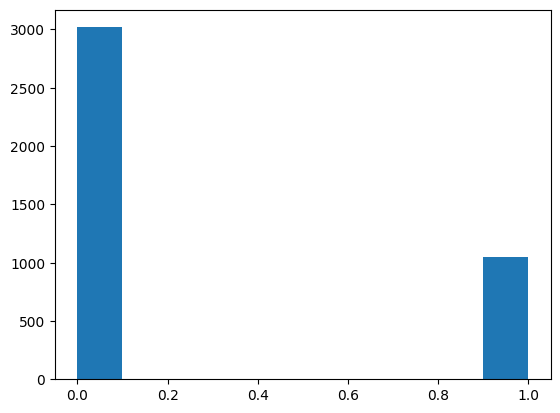

In [37]:
prediction=model.predict(new_data_features)
plt.hist(prediction)
plt.show()

In [39]:
df_test['score'] = prediction
df_test.head()

,text,score
0,j jim whitehead ejw cse ucsc edu writes j you ...,0
1,original message from bitbitch magnesium net p...,0
2,java for managers vince durasoft who just taug...,0
3,there is a youtuber name saiman says,0
4,underpriced issue with high return on equity t...,0


**Экспорт датасета**

In [40]:
df_test.to_csv('score.csv')